In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la

########## Numerical Analysis For PDE ##########
########## Yuchen ZHU 4879058 ##########

#Initialization
Nx = 1000
Ny = int(Nx/2)
h = 8/Nx
alpha = -5

#compute the k, and f function
def fnk(x,y):
    k = 1 + 4*x + 6*y
    return k  
# def fnk(x,y):
#     k = 1
#     return k  

def fnf(xv,yv):
    f_P1 = np.exp(alpha*(xv-1)**2 + alpha*(yv-1)**2)
    f_P2 = np.exp(alpha*(xv-3)**2 + alpha*(yv-1)**2)
    f_P3 = np.exp(alpha*(xv-5)**2 + alpha*(yv-1)**2)
    f_P4 = np.exp(alpha*(xv-7)**2 + alpha*(yv-1)**2)
    f_P5 = np.exp(alpha*(xv-1)**2 + alpha*(yv-3)**2)
    f_P6 = np.exp(alpha*(xv-3)**2 + alpha*(yv-3)**2)
    f_P7 = np.exp(alpha*(xv-5)**2 + alpha*(yv-3)**2)
    f_P8 = np.exp(alpha*(xv-7)**2 + alpha*(yv-3)**2)
    f = f_P1 + f_P2 + f_P3 + f_P4 + f_P5 + f_P6 + f_P7 + f_P8  
    return f


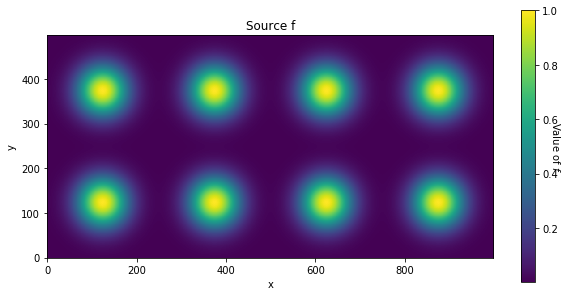

(499, 999)


In [2]:
########## Creating A matrix ##########

# Kij
def Kij(i,j):
    Kij = 0
    Kij = Kij +  fnk(i-0.5,j)
    Kij = Kij +  fnk(i,j-0.5)
    Kij = Kij +  fnk(i+0.5,j)
    Kij = Kij +  fnk(i,j+0.5)
    return Kij

#diagonal at k = 0 , k = 1 and k = Nx-1
dia0 = np.zeros(int((Nx-1)*(Ny-1)))
dia1 = np.zeros(int((Nx-1)*(Ny-1)))
diaMid = np.zeros(int((Nx-1)*(Ny-1))) #diagonal at Nx-1
f = np.zeros(int((Nx-1)*(Ny-1)))
kPrint = np.zeros(int((Nx-1)*(Ny-1)))

#loop over lexicographic order
cnt = 0
for j in range(1,Ny):
    for i in range(1,Nx):
        dia0[cnt] = Kij(i*h,j*h)            #diagonal at k = 0
        dia1[cnt] = -fnk((i+0.5)*h,j*h) #diagonal at k = 1 and k = -1
        diaMid[cnt] = -fnk(i*h,(j+0.5)*h) #diagonal at k = Nx-1 and k = 1-Nx
        f[cnt] = fnf(i*h,j*h)             #source function
        kPrint[cnt] = fnk(i*h, j*h)
        cnt = cnt + 1
RHS = f


#modify diagonal1, satisfying 0 elements and delete last one
for i in range(0,(Nx-1)*(Ny-1)-1):
    if (i+1)%(Nx-1) == 0:
        dia1[i] = 0
dia1 = np.delete(dia1,len(dia1)-1)

#modify diagonal mid, statisfying the length = (Nx-1)*(Ny-2)
indice2del = np.arange((Nx-1)*(Ny-2),(Nx-1)*(Ny-1))
diaMid = np.delete(diaMid,indice2del)

#assemble the matrix
diagonals = [diaMid, dia1,dia0,dia1,diaMid] 
LHS = sp.diags(diagonals, [ 1-Nx, -1 , 0 , 1 , Nx-1 ],format = 'csc')
LHS = LHS*(1/h**2)  #adding the front coefficient

# plt.spy(LHS)
# print(LHS.toarray())

#reshape f
f = np.reshape(f,((Ny-1),(Nx-1)))

#plot for the RHS f
plt.figure(figsize=(10,5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Source f")
plt.imshow(f)
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Value of $f$', rotation=270)
plt.show()
plt.close()
print(f.shape)

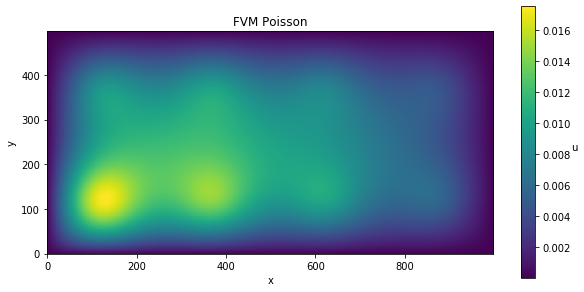

In [3]:
#Solve system of equations
u = la.spsolve(LHS,RHS)

#reshape the result
u = np.reshape(u, (Ny-1,Nx-1))

#plot the result
plt.figure(figsize=(10,5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("FVM Poisson")
plt.imshow(u)
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('u', rotation=0)
plt.show()
plt.close()

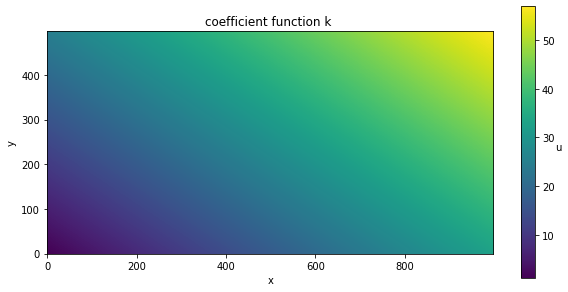

In [4]:
#plot the result
plt.figure(figsize=(10,5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("coefficient function k ")
plt.imshow(kPrint.reshape((Ny-1,Nx-1)))
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('u', rotation=0)
plt.show()
plt.close()